In [2]:
#Utility to generate "realistic" fake experimental data from a hook's law experiment
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time
from copy import *
from math import *
%matplotlib inline

k = 8.25 #spring constant
sigma_x = 0.04 #uncertainty in the x measurement
x_0 = 0.5 #staring position
v_0 = 0.0 #starting velocity
b = 4. #damping
m = 10. #mass

In [3]:
def true_motion(t,x_0,v_0,k,b,m):
    w0 = sqrt(k/m)
    b0 = b/m
    
    if b0**2.-4.*w0**2.>0:
        raise NameError("Not underdamped system! "+ str(b0**2.-4.*w0**2.) )
        
    gamma = 1/2. *sqrt(4*w0**2. - b0**2.)
    
    A = x_0
    B = v_0 + 1/2.*gamma*x_0
    return (A*cos(t*gamma)+B*sin(t*gamma))*exp(-b0*t/m)
    


In [4]:
(np.random.rand()-0.5)*2*sigma_x

0.022643176578224296

In [5]:
t_range = np.linspace(0,20,100)
x_range = np.array([true_motion(t,x_0,v_0,k,b,m)+(np.random.rand()-0.5)*2*sigma_x for t in t_range])

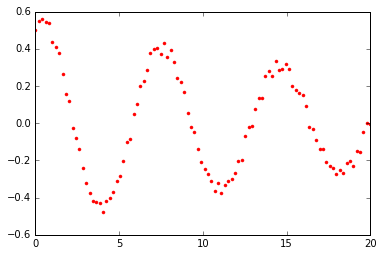

In [6]:
plt.plot(t_range,x_range,"r.")

In [7]:
d_out = np.zeros((100,2))
d_out[:,0]=t_range
d_out[:,1]=x_range
np.savetxt("hooks_law.txt",d_out)

In [8]:
def chi_squared(data,parameter_guess):
    x_0,v_0,k,b,m = parameter_guess
    t_array = data[:,0]
    x_experiment = data[:,1]
    x_guess = np.array([true_motion(t,x_0,v_0,k,b,m) for t in t_array])
    
    chi_squared = np.power((x_guess - x_experiment),2)
    
    return np.sum(chi_squared)
    

In [9]:
chi_squared(d_out,[x_0,v_0,k,b,m])

0.054712124049601775

[0.02028628469566196, 0.0, 0.9462115671034821, 0.15778594189402695, 10.0] 7.957091204
[0.8434644156065296, 0.0, 8.526789379607164, 4.765948459734023, 10.0] 2.88739111557
[0.6057603159118745, 0.0, 7.96885680848752, 3.4341782624425186, 10.0] 0.687575824759
[0.41931450923240143, 0.0, 8.628101738592086, 4.004305178101754, 10.0] 0.467200350665
[0.4243199341574141, 0.0, 7.802889947791205, 0.804250647937067, 10.0] 0.446968258771
[0.45911316148161163, 0.0, 7.902697090223207, 3.8105139285916345, 10.0] 0.296618340581
[0.4551461110445568, 0.0, 7.932331499827793, 3.3219856964223156, 10.0] 0.176342920953
[0.5052037522420736, 0.0, 8.478470781089097, 4.317694447264589, 10.0] 0.0933994477231
true value
0.5 0.0 8.25 4.0 10.0


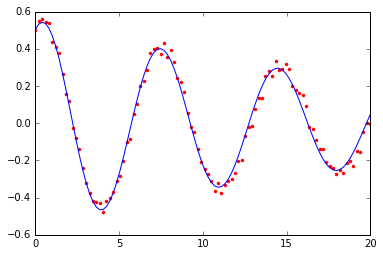

In [84]:
chi_old = 1000.0
for i in range(0,1000):
    x_g = np.random.rand()*1.0
    v_0 = 0.0
    k_g = np.random.rand()*10.0
    b_g = np.random.rand()*5.0
    m_g = 10.0
    try:
        chi_new = chi_squared(d_out,[x_g,v_0,k_g,b_g,m_g])
    except: 
        next
    if chi_new <chi_old:
        chi_old = chi_new
        best_guess = [x_g,v_0,k_g,b_g,m_g]
        print best_guess, chi_new
print "true value"
print x_0,v_0,k,b,m
plt.plot(t_range,x_range,"r.")
plt.plot(t_range,[true_motion(t,best_guess[0],best_guess[1],best_guess[2],best_guess[3],best_guess[4]) for t in t_range])

[0.4681438387515242, 0.0, 8.11616464144549, 3.062539124435336, 10.0] 0.0193357261174
true value
0.5 0.0 8.25 4.0 10.0


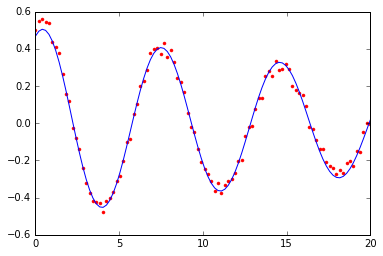

In [83]:
chi_old = 1000.0

#starting point

x_g = np.random.rand()*1.0
v_0 = 0.0
k_g = np.random.rand()*10.0
b_g = np.random.rand()*5.0
m_g = 10.0
best_guess = [x_g,v_0,k_g,b_g,m_g]
chi_old = chi_squared(d_out,[x_g,v_0,k_g,b_g,m_g])
points_array = []
for i in range(0,1000):
    d = sqrt(chi_old)/5. #There is an art/science to choosing this value which we will explore later...
    x_g,v_0,k_g,b_g,m_g = best_guess
    x_g_n = x_g +(np.random.rand()-0.5)*d
    k_g_n = k_g +(np.random.rand()-0.5)*d
    b_g_n = b_g +(np.random.rand()-0.5)*d
    try:
        chi_new = chi_squared(d_out,[x_g_n,v_0,k_g_n,b_g_n,m_g])/4
    except: 
        next
    if chi_new <chi_old:
        chi_old = chi_new
        best_guess = [x_g_n,v_0,k_g_n,b_g_n,m_g]
        points_array.append([x_g_n,v_0,k_g_n,b_g_n,m_g])

print  best_guess , chi_new        
print "true value"
print x_0,v_0,k,b,m
plt.plot(t_range,x_range,"r.")
plt.plot(t_range,[true_motion(t,best_guess[0],best_guess[1],best_guess[2],best_guess[3],best_guess[4]) for t in t_range])